In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Test_data.csv")
df.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


In [ ]:
#adding generes as features
dfx = df.drop(['year','id'],axis=1)
song_features = pd.DataFrame()
# normalizer instance
scaler = MinMaxScaler()
for col in dfx.iloc[:,:].columns:
    if dfx[col].dtypes in ['float64', 'int64']:
        # adding normalized col
        scaler.fit(dfx[[col]])
        song_features[col] = scaler.transform(dfx[col].values.reshape(-1,1)).ravel()   
song_features.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,duration-min
0,0.952811,0.239796,0.027580,0.9270,0.454545,0.507279,0.365189,0.039360,0.511144,0.0398,0.038567
1,0.858434,0.465306,0.484990,0.0884,0.363636,0.138756,0.752995,0.045145,0.701272,0.8590,0.030303
2,0.830321,0.505102,0.498990,0.0000,0.000000,0.393261,0.798520,0.048967,0.498075,0.7090,0.033058
3,0.656626,0.656122,0.468989,0.1080,0.636364,0.206963,0.621782,0.038017,0.385698,0.9640,0.030303
4,0.740964,0.719388,0.310986,0.0000,0.454545,0.312837,0.701636,0.050413,0.540760,0.7850,0.044077


In [ ]:
km = KMeans()
lst = range(1,200)  # k value
sse = [] 
for i in lst:
    km = KMeans(n_clusters = i)
    km.fit(song_features.sample(5000))
    # calculating sse
    sse.append(km.inertia_)

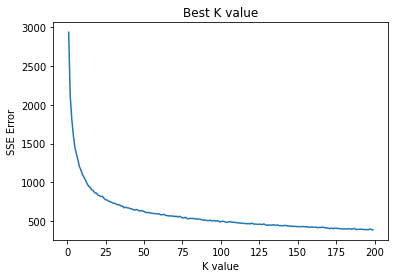

In [ ]:
plt.plot(lst,sse)
plt.xlabel('K value')
plt.ylabel('SSE Error')
plt.title('Best K value')
# plt.ylim(0,400)
# plt.xlim(0,100)
plt.show()

In [ ]:
km = KMeans(n_clusters=25)
predicted_genres = km.fit_predict(song_features)

song_features['predicted_genres'] = predicted_genres
song_features['predicted_genres'] = song_features['predicted_genres'].apply(lambda x: 'Genre'+ str(x))

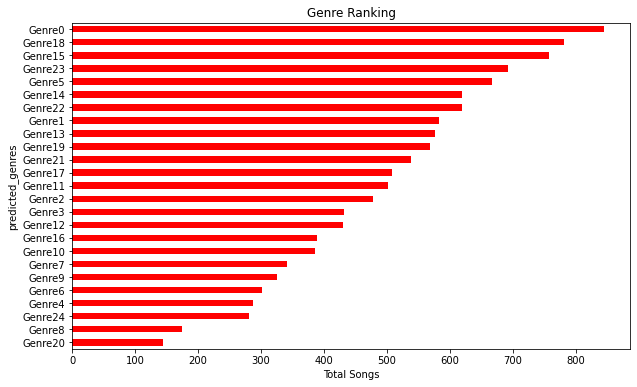

In [ ]:
genres_grp = song_features.groupby(['predicted_genres']).size()
plt.figure(figsize=(10,6))
genres_grp.sort_values(ascending=True).plot.barh(color='red')
plt.xlabel('Total Songs')
plt.title('Genre Ranking')
plt.show()

In [ ]:
df['genre'] = song_features['predicted_genres']

In [ ]:
from google.colab import files
files.download("df.csv")

FileNotFoundError: ignored

In [ ]:
def genre(df):
  df1 = df.drop(['year','id'],axis=1, inplace=False)
  df_num = pd.DataFrame()
  # normalizer instance
  scaler = MinMaxScaler()
  for col in df1.iloc[:,:].columns:
      if df1[col].dtypes in ['float64', 'int64']:
          # adding normalized col
          scaler.fit(df1[[col]])
          df_num[col] = scaler.transform(df1[col].values.reshape(-1,1)).ravel()   
  km = KMeans(n_clusters=25)
  predicted_genres = km.fit_predict(df_num)

  df['predicted_genres'] = predicted_genres
  df['predicted_genres'] = df['predicted_genres'].apply(lambda x: 'Genre'+ str(x))
  return df

In [ ]:
dfs = genre(df)

In [ ]:
dfs

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,predicted_genres
0,2015,0.9490,0.2350,0.0276,No,0.927000,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.03980,1947,3.0,very low,Genre19
1,15901,0.8550,0.4560,0.4850,No,0.088400,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.85900,2020,2.4,low,Genre12
2,9002,0.8270,0.4950,0.4990,No,0.000000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.70900,1950,2.6,very low,Genre12
3,6734,0.6540,0.6430,0.4690,No,0.108000,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.96400,1974,2.4,low,Genre13
4,15563,0.7380,0.7050,0.3110,No,0.000000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.78500,1973,3.4,average,Genre23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,No,0.000000,1,0.353,-5.461,Major,01-07-2014,0.4070,81.940,0.74400,2014,3.4,average,Genre22
12223,1701,0.9120,0.4510,0.2400,No,0.000002,1,0.175,-14.014,Major,01-01-1959,0.0351,134.009,0.70100,1959,2.0,very high,Genre12
12224,3351,0.3280,0.5510,0.5640,No,0.002950,2,0.352,-9.298,Minor,01-01-1984,0.0338,124.883,0.89000,1984,2.5,low,Genre22
12225,8879,0.1220,0.0608,0.9390,No,0.991000,1,0.912,-26.324,Major,09-01-2017,0.1180,73.234,0.00558,2017,3.1,high,Genre17
